## Análisis de Correspondencia Múltiple

In [1]:
library(readxl)
# Para listar las hojas que hay:
#excel_sheets(path="datasets/Malestar_ninos.xlsx")

malestar_niños<-suppressMessages(read_excel("datasets/Malestar_ninos.xlsx", sheet="Hoja1"))
malestar_niños<-as.data.frame(malestar_niños)
vista_previa <- head(malestar_niños,n=5)
vista_previa[,1:7]
vista_previa[,8:(ncol(vista_previa)-1)]
vista_previa[,ncol(vista_previa)]

Edad,Tiempo,Sexo,Malestar,Nausea,Vomito,Abdominal
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
9,22,F,Malestar_Si,Nausea_Si,Vomito_No,Abdominal_Si
5,0,F,Malestar_No,Nausea_no,Vomito_No,Abdominal_No
6,16,F,Malestar_Si,Nausea_no,Vomito_Si,Abdominal_Si
9,0,F,Malestar_No,Nausea_no,Vomito_No,Abdominal_No
7,14,M,Malestar_Si,Nausea_no,Vomito_Si,Abdominal_Si


fiebre,Diarrea,Papas,Pescado,Mayonesa,Calabaza,Queso
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Fiebre_Si,Diarrea_Si,Papas_Si,Pescado_Si,Mayo_y,Calabaza_Si,Queso_Si
Fiebre_No,Diarrea_No,Papas_Si,Pescado_Si,Mayo_y,Calabaza_Si,Queso_No
Fiebre_Si,Diarrea_Si,Papas_Si,Pescado_Si,Mayo_y,Calabaza_Si,Queso_Si
Fiebre_No,Diarrea_No,Papas_Si,Pescado_Si,Mayo_n,Calabaza_Si,Queso_Si
Fiebre_Si,Diarrea_Si,Papas_Si,Pescado_Si,Mayo_y,Calabaza_Si,Queso_Si


[1] "Helado_Si" "Helado_Si" "Helado_Si" "Helado_Si" "Helado_Si"

Vemos el resumen de los datos:

In [2]:
resumen_datos<-summary(as.matrix(malestar_niños))
resumen_datos[,1:5]

      Edad        Tiempo   Sexo          Malestar        Nausea  
  8     :10    0     :17   F:28   Malestar_No:17   Nausea_no:43  
  7     : 9   16     : 5   M:27   Malestar_Si:38   Nausea_Si:12  
  5     : 8   14     : 4                                         
  6     : 8   17     : 4                                         
  9     : 8    9     : 3                                         
 10     : 6   12     : 3                                         
 (Other): 6   (Other):19                                         

In [3]:
resumen_datos[,5:9]

       Nausea         Vomito          Abdominal        fiebre         Diarrea  
 Nausea_no:43   Vomito_No:33   Abdominal_No:18   Fiebre_No:20   Diarrea_No:20  
 Nausea_Si:12   Vomito_Si:22   Abdominal_Si:37   Fiebre_Si:35   Diarrea_Si:35  
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               

In [4]:
resumen_datos[,10:11]

      Papas          Pescado  
 Papas_No: 3   Pescado_No: 1  
 Papas_Si:52   Pescado_Si:54  
                              
                              
                              
                              
                              

Calculamos la matriz de Burt.

In [5]:
library(GDAtools)
# recortamos el resultado, porque se sale de los márgenes.
# burt(malestar_niños[,-c(1:4)])
head(addmargins(burt(malestar_niños[,-c(1:4)])), n=6)[,1:4]

Loading required package: FactoMineR
Loading required package: nleqslv
Loading required package: nnet


,Nausea.Nausea_no,Nausea.Nausea_Si,Vomito.Vomito_No,Vomito.Vomito_Si
Nausea.Nausea_no,43,0,28,15
Nausea.Nausea_Si,0,12,5,7
Vomito.Vomito_No,28,5,33,0
Vomito.Vomito_Si,15,7,0,22
Abdominal.Abdominal_No,18,0,17,1
Abdominal.Abdominal_Si,25,12,16,21


Se prueba la independencia de las variables

In [6]:
library(FactoMineR)
# 1 Diarrea, 2 Vomito, 3 Abdominal, 4 Fiebre, 5 Diarrea
catdes(malestar_niños[,-c(1:4)], num.var=1, proba=.05)$test.chi

,p.value,df
Diarrea,0.003060972,1
Abdominal,0.006284011,1
fiebre,0.022438640,1


In [7]:
catdes(malestar_niños[,-c(1:4)], num.var=3, proba=.05)$test.chi

,p.value,df
fiebre,4.226082e-10,1
Diarrea,4.226082e-10,1
Vomito,2.759485e-04,1
Mayonesa,4.280164e-04,1
Nausea,6.284011e-03,1
Queso,1.949460e-02,1


Se realiza el Análisis de Correspondencia Múltiple (MCA)

In [8]:
library(FactoMineR)
malestar_niños_mca<-MCA(
    malestar_niños,
    quanti.sup=c(1:2),
    quali.sup=c(3:4),
    graph=FALSE
)
malestar_niños_mca$eig[1:8,]

,eigenvalue,percentage of variance,cumulative percentage of variance
dim 1,0.33523140,33.523140,33.52314
dim 2,0.12913979,12.913979,46.43712
dim 3,0.10734849,10.734849,57.17197
dim 4,0.09587950,9.587950,66.75992
dim 5,0.07883277,7.883277,74.64319
dim 6,0.07108981,7.108981,81.75217
dim 7,0.06016580,6.016580,87.76876
dim 8,0.05577301,5.577301,93.34606


_De lo anterior vemos que la primera dimensión explica el 33.52% de la varianza, pero que se necesitan de 7 a 8 dimensiones para explicar el modelo en ~90%_

Creamos el biplot para el MCA con los individuos adicionales y lo guardamos en una variable.

In [9]:
suppressMessages(library(factoextra))
mi_plot <- fviz_mca_biplot(
    malestar_niños_mca,
    repel = TRUE,
    gradient.cols = c('#FFBD5A', '#F22D0F'),    
    col.var = "contrib", # Color variable por contribución    
    col.ind = "#D3D3D3", # Color individuo
    shape.row = 1, 
    shape.col = 3,
    # Dibujar flecha para c(ROW,COLUMN)
    #arrow = c(FALSE, TRUE)
) + labs(title = "")

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


Graficamos.

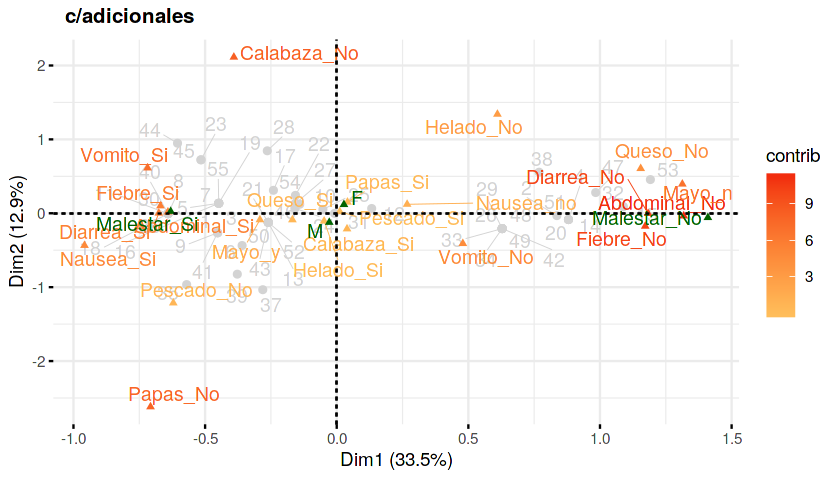

In [10]:
suppressMessages(library(cowplot))
library(repr)
#reducimos el tamaño del gráfico para la impresión
options(repr.plot.width=7, repr.plot.height=4)
plot_grid(mi_plot,
    #mi_plot2,
    labels = c('c/adicionales'),
    label_size = 12,
    ncol=1
)

Creamos la gráfica para ver la correlación de la categorías con las dimensiones del MCA y la guardamos en una variable.

In [11]:
library(factoextra)
options(repr.plot.width=6, repr.plot.height=4)
# Graficando las variables
plot_var <- fviz_mca_var(
    axes = c(1,2),
    malestar_niños_mca,
    choice = "mca.cor",
    repel = TRUE,
    col.quanti.sup = "#D3D3D3"
) + labs(title = "")

plot_var2 <- fviz_mca_var(
    axes = c(2,3),
    malestar_niños_mca,
    choice = "mca.cor",
    repel = TRUE,
    col.quanti.sup = "#D3D3D3"
) + labs(title = "")

Hacemos la gráfica de las dimensiones 1, 2 y 3.

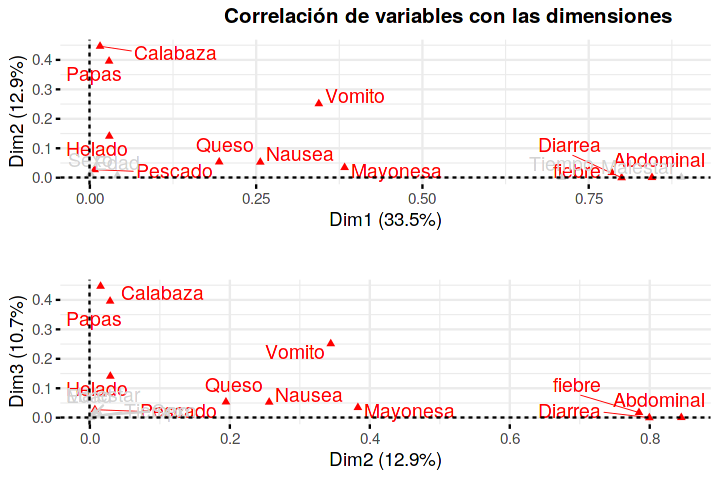

In [12]:
library(cowplot)

plot_grid(plot_var,
    plot_var2,
    labels = c('Correlación de variables con las dimensiones'),
    label_size = 12,
    ncol=1
)

Hacemos el gráfico para ver el agrupamiento de la variable malestar.

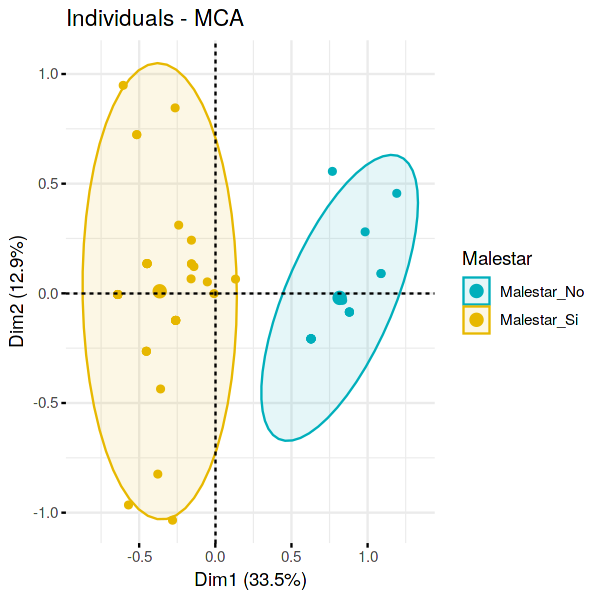

In [13]:
options(repr.plot.width=5, repr.plot.height=5)
fviz_mca_ind(
    malestar_niños_mca, 
    label = "none", # Eliminar etiquetas
    habillage = "Malestar", # color por variable
    palette = c("#00AFBB", "#E7B800"),
    addEllipses = TRUE,    
    # ellipse.type = "confidence",
    ellipse.level = 0.95,
    ggtheme = theme_minimal()
)

In [14]:
options(repr.plot.width=5, repr.plot.height=5)
plot_dim1 <- fviz_contrib(malestar_niños_mca, choice = "var", axes = 1, top = 15)+
    labs(title = "")

In [15]:
plot_dim2 <- fviz_contrib(malestar_niños_mca, choice = "var", axes = 2, top = 15)+
    labs(title = "")

Calculamos la contribución de las variables a las dimensiones:

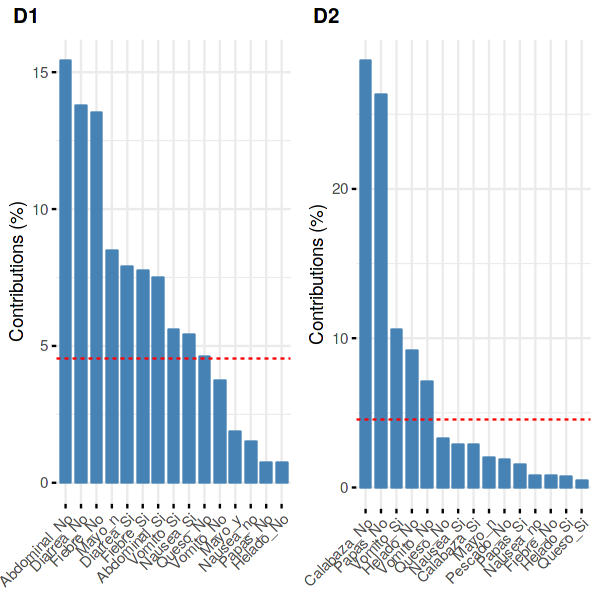

In [16]:
library(cowplot)
plot_grid(plot_dim1,
    plot_dim2,
    labels = c('D1', 'D2'),
    label_size = 12,
    ncol=2
)

In [17]:
# Extraemos las coordenadas del MCA
coord_malestar_mca <- as.data.frame(malestar_niños_mca$var$coord)

# Aplicamos una expresión regular para extraer los que no
entradas_a_filtrar <- grep("_n", tolower(rownames(coord_malestar_mca)), value = T)

# Filtramos los valores basados en la lista
malestares_si<-coord_malestar_mca[!(tolower(rownames(coord_malestar_mca)) %in% entradas_a_filtrar),]
valores_si <- rownames(malestares_si)

Creamos el biplot para las variables que representan al malestar y consumo de alguno de los alimentos.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


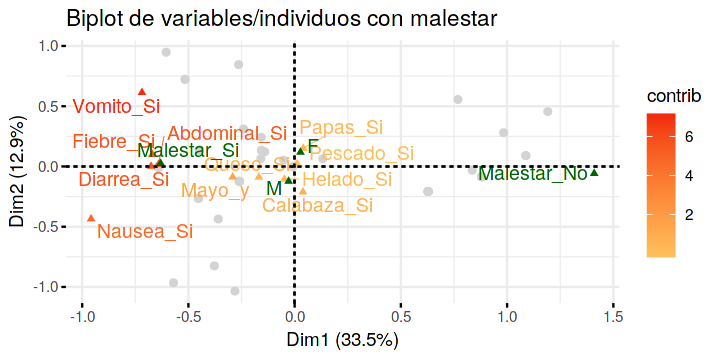

In [18]:
options(repr.plot.width=6, repr.plot.height=3)
# Agregamos las variables adicionales al vector para seleccionar.
valores_seleccionados <- rbind(valores_si,"F","M","Malestar_Si","Malestar_No")
fviz_mca_biplot(
    malestar_niños_mca,
    repel = TRUE, # Evitar superposición
    axes = c(1,2), # Selección de dimensiones
    gradient.cols = c('#FFBD5A', '#F22D0F'),
    label = "var", # Agregar etiquetas sólo a las variables. 
    col.var = "contrib", # Color variable por contribución    
    col.ind = "#D3D3D3", # Color individuo
    shape.row = 1, 
    shape.col = 4,
    # El gráfico permite seleccionar variables por nombre.
    select.var=list(name=valores_seleccionados),
    # seleccionar el top n de individuos
    # select.ind=list(contrib=15)    
) + labs(title = "Biplot de variables/individuos con malestar")

Hacemos el gráfico de las dimensiones 1 y 3

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


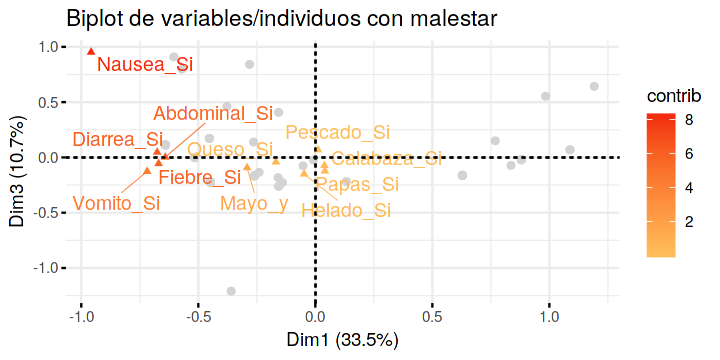

In [19]:
# Agregamos las variables adicionales al vector para seleccionar.
valores_seleccionados <- rbind(valores_si)
fviz_mca_biplot(
    malestar_niños_mca,
    repel = TRUE, # Evitar superposición
    axes = c(1,3), # Selección de dimensiones
    gradient.cols = c('#FFBD5A', '#F22D0F'),
    label = "var", # Agregar etiquetas sólo a las variables. 
    col.var = "contrib", # Color variable por contribución    
    col.ind = "#D3D3D3", # Color individuo
    shape.row = 1, 
    shape.col = 4,
    # El gráfico permite seleccionar variables por nombre.
    select.var=list(name=valores_seleccionados),
    # seleccionar el top n de individuos
    # select.ind=list(contrib=15)  
) + labs(title = "Biplot de variables/individuos con malestar")

Revisamos las variables para ver si hay intersección:

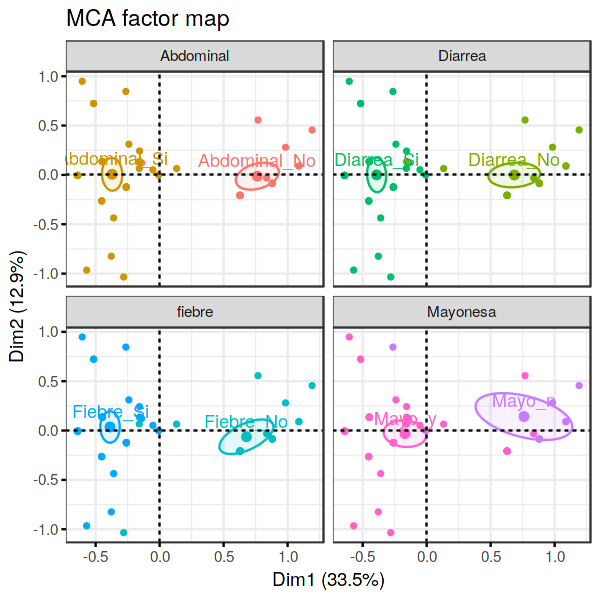

In [20]:
options(repr.plot.width=5, repr.plot.height=5)
fviz_ellipses(
    malestar_niños_mca,    
    #c("Diarrea", "fiebre", "Abdominal"),
    c("Mayonesa", "Diarrea", "fiebre", "Abdominal"),
    geom = "point",
    addEllipses = TRUE,
    #ellipse.type = "confidence",
    ellipse.level = 0.95,
    select.var=list(name=valores_seleccionados)
)

De los gráficos anteriores se obtiene lo siguiente:

  - Los niños que presentaron malestares, tuvieron _principalmente_ vómito, fiebre, diarrea y dolor abdominal.
  
  - Al parecer, hay cierta asociación entre la mayonesa y los malestares del punto anterior; pero no es lo suficientemente fuerte como para afirmar que causó alguno de los malestares.
  
  - Contrario a lo que se pensaría, el consumo de pescado (así como calabaza y papas) no causó ningún malestar.
  
  - Por el gráfico, parecería que 3 niños vomitaron.

<sub>Nota: Los gráficos anteriores fueron realizados con la ayuda del siguiente [sitio web](http://www.sthda.com/english/wiki/print.php?id=232)<sub>